## Factor Analysis

In [7]:
# !pip install factor_analyzer
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt    
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import preprocessing

import factor_analyzer
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv('05_FINAL_MLpart.csv')
df

,name,city,latitude,longitude,price_level,rating,review_count,delivery,pickup,reservation,...,City,New York,Chicago,Washington,San Francisco,Michelin,price1,price2,price3,price4
0,Upstate,New York,40.726314,-73.986490,2,4.5,1699,0,0,1,...,New York,1,0,0,0,0,0,1,0,0
1,Amélie,New York,40.732700,-73.997660,2,4.5,2428,0,0,1,...,New York,1,0,0,0,0,0,1,0,0
2,Uglyduckling,New York,40.686023,-73.991302,2,4.0,432,1,1,1,...,New York,1,0,0,0,0,0,1,0,0
3,Aunt Jake's,New York,40.719031,-73.997716,2,4.0,1143,1,1,1,...,New York,1,0,0,0,0,0,1,0,0
4,LoveMama,New York,40.730386,-73.986061,2,4.0,4136,1,1,1,...,New York,1,0,0,0,0,0,1,0,0
5,Joe's Shanghai,New York,40.714669,-73.997760,2,4.0,5686,0,0,0,...,New York,1,0,0,0,0,0,1,0,0
6,Jacob's Pickles,New York,40.786650,-73.975528,2,4.0,3632,0,0,0,...,New York,1,0,0,0,0,0,1,0,0
7,Boucherie West Village,New York,40.733063,-74.002877,3,4.5,989,1,1,1,...,New York,1,0,0,0,0,0,0,1,0
8,Burger & Lobster,New York,40.740070,-73.993440,2,4.0,5002,1,1,1,...,New York,1,0,0,0,0,0,1,0,0
9,Root & Bone,New York,40.722720,-73.983340,2,4.0,1474,1,1,0,...,New York,1,0,0,0,0,0,1,0,0


In [10]:
df.columns

Index(['name', 'city', 'latitude', 'longitude', 'price_level', 'rating',
       'review_count', 'delivery', 'pickup', 'reservation', 'alias',
       'categories', 'coordinates', 'display_phone', 'distance', 'id',
       'image_url', 'is_closed', 'location', 'phone', 'price', 'transactions',
       'url', 'reviews', 'vader', 'vader_positive', 'vader_negative',
       'compound', 'neutral', 'vader_pos_neg', 'NRC', 'NRC_positive',
       'NRC_surprise', 'NRC_anticipation', 'NRC_sadness', 'NRC_negative',
       'NRC_trust', 'NRC_anger', 'NRC_joy', 'NRC_disgust', 'NRC_fear',
       'NRC_pos_neg', 'category', 'French', 'American (Traditional)', 'Korean',
       'Italian', 'Thai', 'American (New)', 'Chinese', 'Japanese',
       'Mediterranean', 'Spanish', 'Mexican', 'Indian', 'British', 'Seafood',
       'Wine Bars', 'Steakhouses', 'Dim Sum', 'City', 'New York', 'Chicago',
       'Washington', 'San Francisco', 'Michelin', 'price1', 'price2', 'price3',
       'price4'],
      dtype='object')

In [11]:
# 'vader_positive', 'NRC_positive','NRC_joy', 'NRC_surprise', 'NRC_anticipation', 'NRC_trust','compound', 'neutral',
# 'vader_negative', 'NRC_negative','NRC_sadness', 'NRC_anger',  'NRC_disgust', 'NRC_fear',             
# 'rating', 'review_count','sims_score','Mi_nomi_score_scale','star', 'New York', 'Chicago', 'Washington', 'San Francisco', 
# 'price1', 'price2', 'price3', 'price4', 'delivery', 'pickup', 'reservation', 'price_level', 'is_Michelin'
# 'star','sims_score','Mi_nomi_score_scale','star',
df_fa = df[['NRC_positive','compound', 'neutral', 'NRC_negative','rating', 'review_count',
            'price1', 'price2', 'price3', 'price4','delivery', 'pickup', 'reservation']]  # 18
df_fa = pd.DataFrame(preprocessing.scale(df_fa),columns=df_fa.columns)

In [12]:
fac_num=8
fa = FactorAnalyzer(n_factors=fac_num,rotation='varimax',method='principal', impute='drop' )  #n_factors=10,
fa.fit(df_fa)

fa.get_communalities()  #

total_var = pd.DataFrame(np.matrix(fa.get_factor_variance()).T,columns=['variance','proportion_var_explain','cumulative_var_explain'])
total_var
# variance – The factor variances.
# proportional_variance – The proportional factor variances.
# cumulative_variances 

,variance,proportion_var_explain,cumulative_var_explain
0,2.334273,0.179559,0.179559
1,1.850096,0.142315,0.321875
2,1.625360,0.125028,0.446902
3,1.329798,0.102292,0.549194
4,1.303388,0.100261,0.649455
5,1.132602,0.087123,0.736578
6,1.019008,0.078385,0.814963
7,1.001691,0.077053,0.892017


In [13]:
chi_square_value,p_value=calculate_bartlett_sphericity(df_fa.dropna())
kmo = calculate_kmo(df_fa.dropna())
chi_square_value, p_value
kmo[1]
# Represents the degree to which each observed variable is predicted by the other variables in the dataset.
# In general, a KMO > 0.6 is considered adequate.

0.3246331364374975

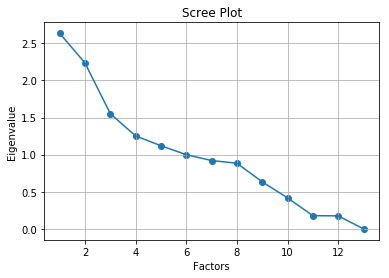

In [14]:
ev, v = fa.get_eigenvalues()  #  eigen values
plt.scatter(range(1,df_fa.shape[1]+1),ev)
plt.plot(range(1,df_fa.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

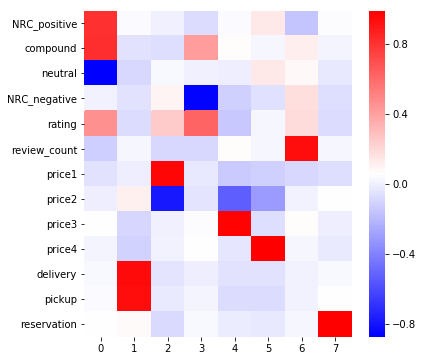

In [15]:
factor_loads = pd.DataFrame(np.matrix(fa.loadings_),index=df_fa.columns) # Factor Loadings Matrix
plt.figure(figsize=(6,6))
sns.heatmap(factor_loads, xticklabels= True, yticklabels= True,cmap="bwr")  
# factor0: positive adj factor, 0: positive review factor, 1: neg fac, 2: polarity pos-neg, 3: Michelin specific, 4: services, 
# 5: nonMi specific, 6: reviews, 7: reservation
 

In [16]:
df_newfa = pd.DataFrame(np.matrix(fa.transform(df_fa.fillna(0))))  # Get the factor scores for new data set

y = df['Michelin']
X = sm.add_constant(df_newfa)
model = sm.OLS(y, X).fit()

model.summary()

tvalues = model.tvalues[1:]#/sum(model.tvalues[1:])
# tvalues = model.params[1:]/sum(model.params[1:])

def sort_factors(series, t):
    if t > 0: # positive
        return np.argsort(np.argsort(-series))/sum(np.argsort(-series))
    else: return np.argsort(np.argsort(series))/sum(np.argsort(-series))

for i in range(fac_num):
    df_newfa['factor'+str(i)+'order']= sort_factors(df_newfa.iloc[:,i], tvalues[i])
    
df_newfa['total_order'] = df_newfa.iloc[:,-fac_num:].apply(lambda row: np.dot(row,tvalues),axis=1)

df['FactorAnaScore']=df_newfa['total_order']

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Michelin   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     404.4
Date:                Thu, 02 May 2019   Prob (F-statistic):               0.00
Time:                        14:45:59   Log-Likelihood:                 1438.8
No. Observations:                3809   AIC:                            -2860.
Df Residuals:                    3800   BIC:                            -2803.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0538      0.003     20.004      0.000       0.049       0.059
0              0.0034      0.003      1.266      0.206      -0.002       0.009
1             -0.0272      0.003    -10.095      0.000      -0.032      -0.022
2             -0.0014      0.003     -0.517      0.605      -0.007       0.004
3              0.0069      0.003      2.566      0.010       0.002       0.012
4              0.0310      0.003     11.541      0.000       0.026       0.036
5              0.1468      0.003     54.573      0.000       0.142       0.152
6              0.0080      0.003      2.965      0.003       0.003       0.013
7             -0.0058      0.003     -2.148      0.032      -0.011      -0.001
==============================================================================
Omnibus:                     2263.461   Durbin-Watson:                   1.324
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63352.741
Skew:                           2.324   Prob(JB):                         0.00
Kurtosis:                      22.431   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
def get_potentials(df,top=10):
    potent=[]
    for i in df.index:
        potent.append([df['FactorAnaScore'][i],df['name'][i]])
    potential_list = sorted(potent)[:top]
    return potential_list

pre_list = get_potentials(df,top=202)
wall = pre_list[-1][0]

df['reco'] = np.where(df['FactorAnaScore']<wall,1,0)

Precision:			0.31 identified as Michelin are Michelin
Recall/TPR:			0.31 proportion of Michelin identified
False Positive Rate:		0.04 proportion of Non-Michelin identified as Michelin
f-score:			0.31 tradeoff between precision and recall
Accuracy:			0.93 how well the model has classified


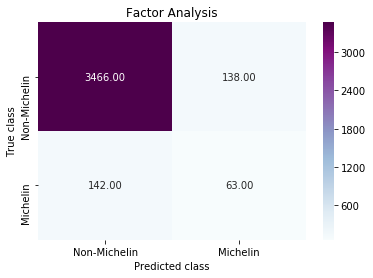

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
fa_cm = metrics.confusion_matrix(df['Michelin'], df['reco'])
sns.heatmap(fa_cm, annot=True, cmap = "BuPu", fmt='.2f',xticklabels = ["Non-Michelin", "Michelin"] , yticklabels = ["Non-Michelin", "Michelin"] )
import matplotlib.pyplot as plt
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Factor Analysis')
plt.savefig('factor_ana_cm')

def c_m_analysis(y_test,logreg_y_pred,fa_cm):
    tn, fp, fn, tp = fa_cm.ravel()
    tpr = tp/(tp+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    fpr = fp/(fp+tn)
    f_score = 2*precision*tpr/(precision+tpr)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    print("Precision:\t\t\t%1.2f identified as Michelin are Michelin"%(precision))
    print("Recall/TPR:\t\t\t%1.2f proportion of Michelin identified"%(recall))
    print("False Positive Rate:\t\t%1.2f proportion of Non-Michelin identified as Michelin"%fpr)
    print("f-score:\t\t\t%1.2f tradeoff between precision and recall"%(f_score))
    print("Accuracy:\t\t\t%1.2f how well the model has classified"%(accuracy))

c_m_analysis(df['Michelin'],df['reco'],fa_cm)

### Applied SMOTE to over-sample minority classes 

In [114]:
# !pip install imblearn

In [24]:
def Factor_Analyse(df_factor, fac_num=8, y = df['Michelin']):
    df_factor = pd.DataFrame(preprocessing.scale(df_factor),columns=df_fa.columns)
    fa = FactorAnalyzer(n_factors=fac_num,rotation='varimax',method='principal', impute='drop' )  #n_factors=10,
    fa.fit(df_factor)
    total_var = pd.DataFrame(np.matrix(fa.get_factor_variance()).T,columns=['variance','proportion_var_explain','cumulative_var_explain'])
    chi_square_value,p_value=calculate_bartlett_sphericity(df_factor.dropna())
    kmo = calculate_kmo(df_factor.dropna())
    ev, v = fa.get_eigenvalues()  #  eigen values
    factor_loads = pd.DataFrame(np.matrix(fa.loadings_),index=df_factor.columns) # Factor Loadings Matrix
    plt.figure(figsize=(6,6))
    sns.heatmap(factor_loads, xticklabels= True, yticklabels= True,cmap="bwr")  
    
    df_newfa = pd.DataFrame(np.matrix(fa.transform(df_factor.fillna(0))))  # Get the factor scores for new data set

    X = sm.add_constant(df_newfa)
    model = sm.OLS(y, X).fit()
    tvalues = model.tvalues[1:]
    
    def sort_factors(series, t):
        if t > 0: return np.argsort(np.argsort(-series))/sum(np.argsort(-series))
        else: return np.argsort(np.argsort(series))/sum(np.argsort(-series))

    for i in range(fac_num): df_newfa['factor'+str(i)+'order']= sort_factors(df_newfa.iloc[:,i], tvalues[i])

    df_newfa['total_order'] = df_newfa.iloc[:,-fac_num:].apply(lambda row: np.dot(row,tvalues),axis=1)

    def get_potentials(df_newfa,top=10):
        potent=[]
        for i in df_newfa.index: potent.append([df_newfa['total_order'][i],i])
        potential_list = sorted(potent)[:top]
        return potential_list

    pre_list = get_potentials(df_newfa,top=int(sum(y)))
    wall = pre_list[-1][0]
    df_newfa['reco'] = np.where(df_newfa['total_order']<wall,1,0)
    
    return df_newfa['reco']

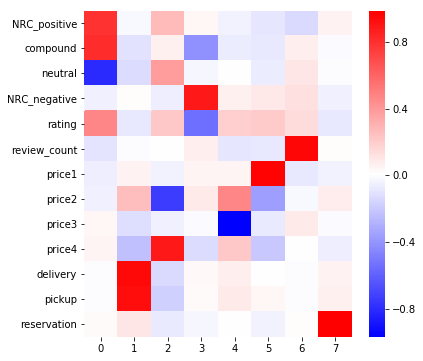

In [25]:
# 'vader_positive', 'NRC_positive','NRC_joy', 'NRC_surprise', 'NRC_anticipation', 'NRC_trust','compound', 'neutral',
# 'vader_negative', 'NRC_negative','NRC_sadness', 'NRC_anger',  'NRC_disgust', 'NRC_fear',             
# 'rating', 'review_count','sims_score','Mi_nomi_score_scale','star', 'New York', 'Chicago', 'Washington', 'San Francisco', 
# 'price1',  'price2', 'price3','price4', 'delivery', 'pickup', 'reservation', 'price_level', 'is_Michelin'
# 'star','sims_score','Mi_nomi_score_scale

df_fa = df[['NRC_positive','compound', 'neutral', 'NRC_negative','rating', 'review_count',
            'price1', 'price2', 'price3','price4','delivery', 'pickup', 'reservation']]  # 18

from imblearn.over_sampling import SMOTE, ADASYN

y = df['Michelin']
X = df_fa

X_resampled, y_resampled = SMOTE().fit_resample(X, y)

pre_list = Factor_Analyse(X_resampled, fac_num=8, y = y_resampled)

Precision:			0.7497 identified as Michelin are Michelin
Recall/TPR:			0.7494 proportion of Michelin identified
False Positive Rate:		0.2503 proportion of Non-Michelin identified as Michelin
f-score:			0.7495 tradeoff between precision and recall
Accuracy:			0.7496 how well the model has classified


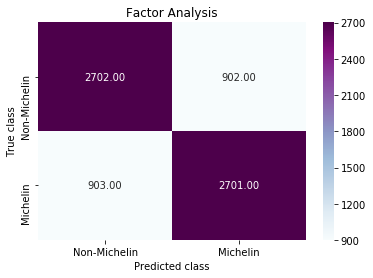

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
fa_smote_cm = metrics.confusion_matrix(y_resampled, pre_list)
sns.heatmap(fa_smote_cm, annot=True, cmap = "BuPu", fmt='.2f',xticklabels = ["Non-Michelin", "Michelin"] , yticklabels = ["Non-Michelin", "Michelin"] )
import matplotlib.pyplot as plt
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Factor Analysis')
plt.savefig('factor_ana_cm')

def c_m_analysis(y_test,logreg_y_pred,fa_cm):
    tn, fp, fn, tp = fa_cm.ravel()
    tpr = tp/(tp+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    fpr = fp/(fp+tn)
    f_score = 2*precision*tpr/(precision+tpr)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    print("Precision:\t\t\t%1.4f identified as Michelin are Michelin"%(precision))
    print("Recall/TPR:\t\t\t%1.4f proportion of Michelin identified"%(recall))
    print("False Positive Rate:\t\t%1.4f proportion of Non-Michelin identified as Michelin"%fpr)
    print("f-score:\t\t\t%1.4f tradeoff between precision and recall"%(f_score))
    print("Accuracy:\t\t\t%1.4f how well the model has classified"%(accuracy))

c_m_analysis(y_resampled, pre_list,fa_smote_cm)

### Another Prediction via Factor Analysis

In [38]:
pre_ny = get_potentials(df[(df['Michelin']==0)& (df['city']=='New York')],top=20)
pre_ca = get_potentials(df[(df['Michelin']==0)& (df['city']=='Chicago')],top=20)
pre_dc = get_potentials(df[(df['Michelin']==0)& (df['city']=='Washington')],top=20)
pre_sf = get_potentials(df[(df['Michelin']==0)& (df['city']=='San Francisco')],top=20)

In [13]:
# from sklearn.datasets import load_digits
# from sklearn.decomposition import FactorAnalysis
# fa2 = FactorAnalysis(n_components=10, svd_method='randomized',random_state=None)  # lapack
# fa2.fit(test.dropna())

# pd.DataFrame(np.matrix(fa2.fit_transform(test.fillna(0))))

In [43]:
pd.DataFrame(pre_sf)

,0,1
0,-0.002845,Krispy Krunchy Chicken
1,-0.002161,Little Gem Belgian Waffles
2,-0.002035,Lola's Chicken Shack
3,-0.002016,AZIT
4,-0.001998,Spices 3
5,-0.001742,Chez Panisse
6,-0.001739,Sweet Fingers
7,-0.001288,Siam Bay Authentic Thai Cuisine
8,-0.001058,Roll & Bowl
9,-0.000967,Juanita & Maude


### PCA

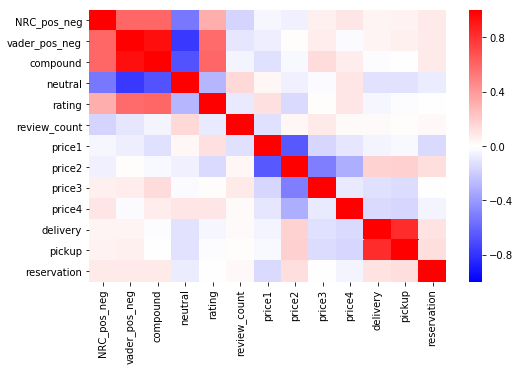

In [27]:
# 'vader_positive', 'vader_negative', 'compound', 'neutral', 
# 'NRC_positive', 'NRC_surprise', 'NRC_anticipation','NRC_negative', 'NRC_trust', 'NRC_anger',  'NRC_sadness','NRC_joy', 'NRC_disgust' 'NRC_fear',
# 'rating', 'review_count','New York', 'Chicago', 'Washington', 'San Francisco', 
# 'price1', 'price2', 'price3', 'price4','delivery', 'pickup', 'reservation'
from sklearn.decomposition import PCA

df_pca = df[['NRC_pos_neg','vader_pos_neg','compound', 'neutral', 'rating', 'review_count',
                 'price1', 'price2', 'price3', 'price4','delivery', 'pickup', 'reservation']]

df_pca = pd.DataFrame(preprocessing.scale(df_pca),columns=df_pca.columns)

corr_mat = df_pca.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_mat, vmax=1,vmin = -1, xticklabels= True, yticklabels= True,cmap="bwr")

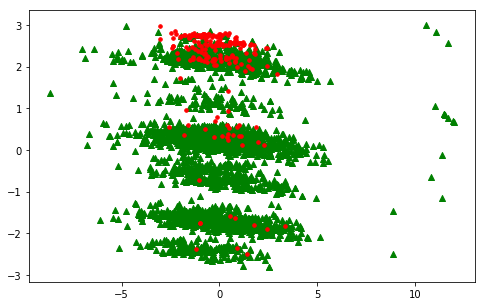

In [28]:
y = df['Michelin']
x = df_pca

pca=PCA(n_components=5)
reduced_x=pca.fit_transform(x)

mi_x,mi_y = [],[]
nonmi_x,nonmi_y = [],[]
for i in range(len(reduced_x)):
    if y[i] ==1:
        mi_x.append(reduced_x[i][0])
        mi_y.append(reduced_x[i][1])
    else:
        nonmi_x.append(reduced_x[i][0])
        nonmi_y.append(reduced_x[i][1])

plt.figure(figsize=(8,5))
plt.scatter(mi_x,mi_y,c='r',marker='.',s=50,zorder=2)
plt.scatter(nonmi_x,nonmi_y,c='g',marker='^')
# plt.ylim(-10,10) # plt.xlim(-10,10)
plt.show()

#### The result didn't show significant distinction between the two kinds of restaurants, so we didn't go deeper into this method.